<a href="https://colab.research.google.com/github/Aravin423/ml_lab/blob/main/ML_WEEK_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

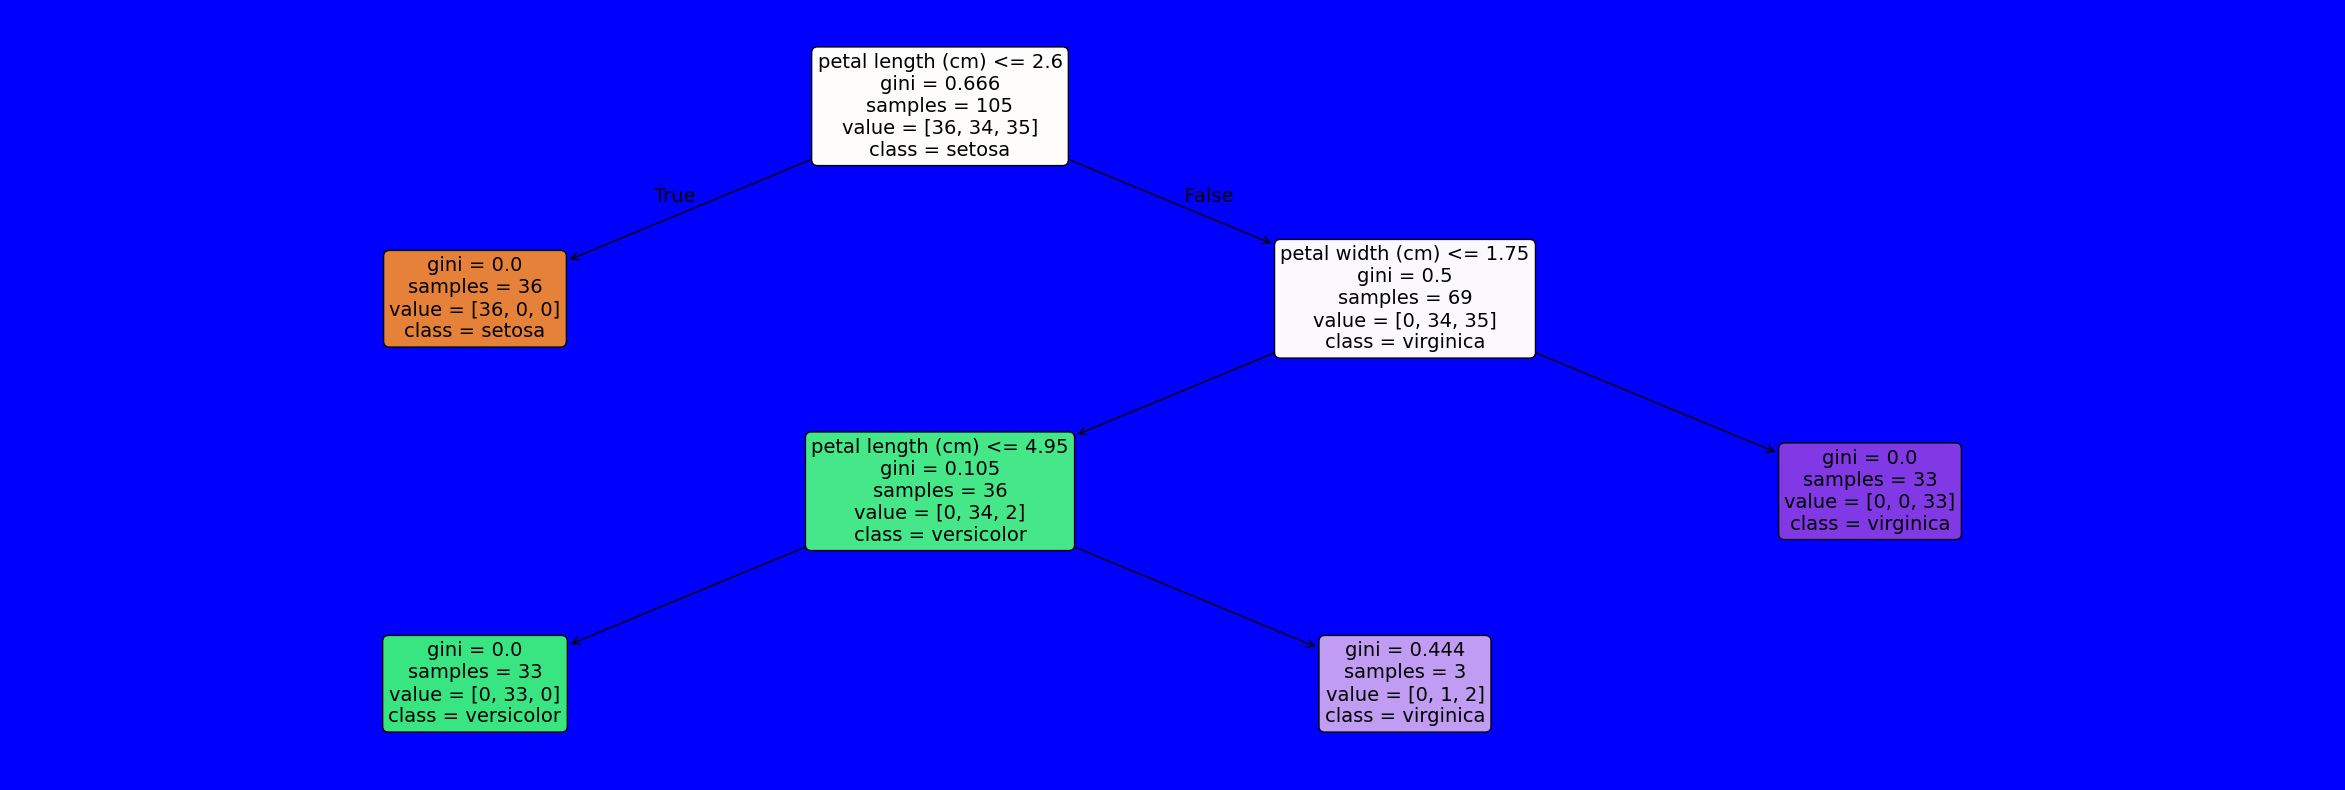

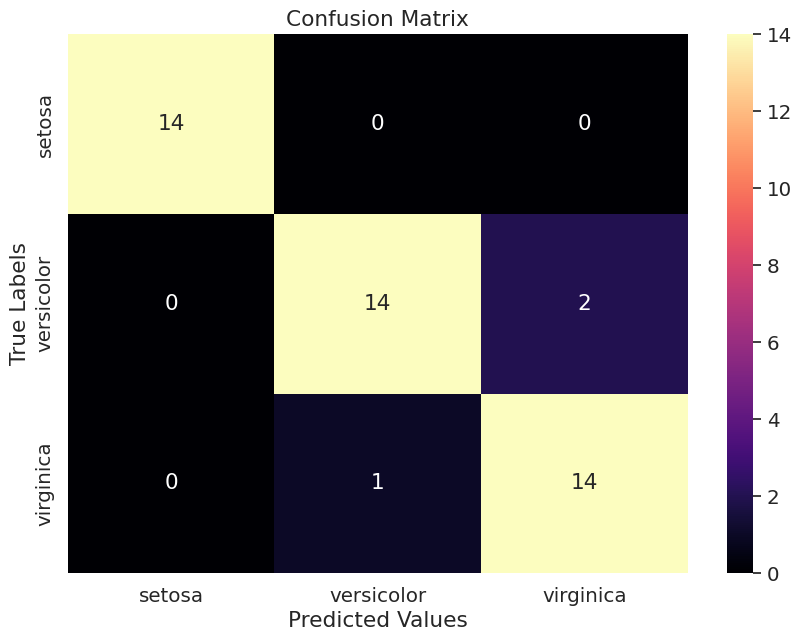

In [4]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Loading the Iris dataset
iris = load_iris()

# Converting the data to a pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target  # Adding target variable

# Replacing numeric target values with species names
target_dict = dict(zip(np.unique(iris.target), np.unique(iris.target_names)))
data['Species'] = data['Species'].replace(target_dict)

# Separating features (X) and target variable (y)
X = data.drop(columns="Species")
y = data["Species"]
feature_names = X.columns
target_labels = np.unique(y)

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

# Creating and training the Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=93)
dtc.fit(X_train, y_train)

# Visualizing the Decision Tree
plt.figure(figsize=(30, 10), facecolor='b')
plot_tree(dtc, feature_names=feature_names, class_names=target_labels, rounded=True, filled=True, fontsize=14)
plt.show()

# Making predictions on the test set
y_pred = dtc.predict(X_test)

# Generating the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)

# Plotting a heatmap for the confusion matrix
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt="g", cmap="magma", xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Labels")
plt.show()